# Structure Functions

In [93]:
import sys,os
import numpy  as np
import sympy  as sp
import pylab  as py
import pandas as pd

#--matplotlib
import matplotlib
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
#matplotlib.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
matplotlib.rc('text',usetex=True)
import pylab  as py
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from tools import load, save


/home/nobuo/apps/anaconda3/envs/snakes3/lib/python3.6/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  if __name__ == '__main__':


In [168]:
def convert(data):
    T={}
    for order in ['xsec00','xsec10','xsec01A','xsec01B','xsec01C','xsec_res0','xsec_res1']:
        d=data.query("order=='%s'"%order)
        pT=d.pT
        T[order]=d.thy.values
    T['pT']=pT
    T['x']=d.x
    T['Q2']=d.Q2
    return T

In [169]:
def plot_main00(ax,rs,eta,color):
    data=load('data/main00-rs=%f-eta=%f.po'%(rs,eta))
    data=pd.DataFrame(data).sort_values(by=['pT'])
    T=convert(data)
    pT=T['pT']
    T0=T['xsec00']
    #ax.plot(pT,T['xsec00'],'r-',lw=3,label=r'$\rm LO$')
    p1,=ax.plot(pT,T0/(T['xsec00']+T['xsec01A']+T['xsec10'])
                ,ls=':',color=color,lw=3,label=r'$\rm LO$')
    p2,=ax.plot(pT,T0/(T['xsec00']+T['xsec_res0']),'r--'
                ,ls='--',color=color,lw=3,label=r'$\rm LO$')
    p3,=ax.plot(pT,T0/(T['xsec00']+T['xsec_res1'])
                ,ls='-',color=color,lw=3,label=r'$\rm LO$')
    return ax

In [170]:
def plot_main01(ax,rs,Q2,color):
    data=load('data/main01-rs=%f-Q2=%f.po'%(rs,Q2))
    data=pd.DataFrame(data).sort_values(by=['pT'])
    T=convert(data)
    x=T['x']
    T0=T['xsec00']
    #ax.plot(pT,T['xsec00'],'r-',lw=3,label=r'$\rm LO$')
    ax.plot(x,T0/(T['xsec00']+T['xsec01A']+T['xsec10'])
            ,ls=':',color=color,lw=3,label=r'$\rm LO$')
    ax.plot(x,T0/(T['xsec00']+T['xsec_res0'])
            ,ls='--',color=color,lw=3,label=r'$\rm LO$')
    ax.plot(x,T0/(T['xsec00']+T['xsec_res1'])
            ,ls='-',color=color,lw=3,label=r'$\rm LO$')

In [174]:
def plot_main03(ax,rs,x,color):
    data=load('data/main03-rs=%f-x=%f.po'%(rs,x))
    data=pd.DataFrame(data).sort_values(by=['Q2'])
    T=convert(data)
    Q2=T['Q2']
    T0=T['xsec00']
    #ax.plot(pT,T['xsec00'],'r-',lw=3,label=r'$\rm LO$')
    ax.plot(Q2,T0/(T['xsec00']+T['xsec01A']+T['xsec10'])
            ,ls=':',color=color,lw=3,label=r'$\rm LO$')
    ax.plot(Q2,T0/(T['xsec00']+T['xsec_res0'])
            ,ls='--',color=color,lw=3,label=r'$\rm LO$')
    ax.plot(Q2,T0/(T['xsec00']+T['xsec_res1'])
            ,ls='-',color=color,lw=3,label=r'$\rm LO$')

/home/nobuo/apps/anaconda3/envs/snakes3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/home/nobuo/apps/anaconda3/envs/snakes3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/home/nobuo/apps/anaconda3/envs/snakes3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':
/home/nobuo/apps/anaconda3/envs/snakes3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/home/nobuo/apps/anaconda3/envs/snakes3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/home/nobuo/apps/anaconda3/envs/snakes3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning:

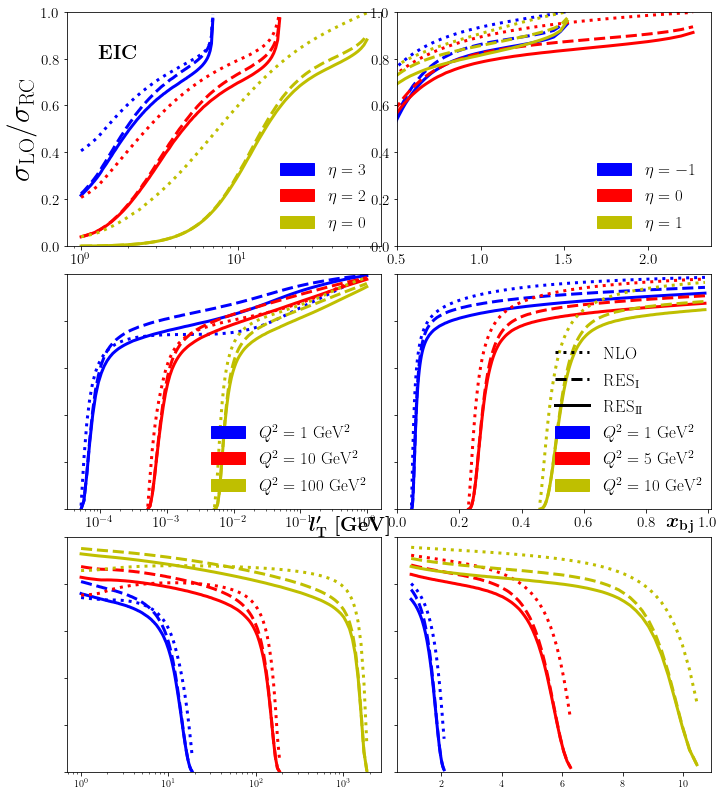

In [188]:
nrows,ncols=3,2
fig = py.figure(figsize=(ncols*5,nrows*4))
py.subplots_adjust(left=0.085, 
                   bottom=0.1, 
                   right=0.98, 
                   top=0.98, 
                   wspace=0.05, 
                   hspace=0.12)

##################################33
ax=py.subplot(nrows,ncols,1)
rs=140
plot_main00(ax,rs,3,'b')
plot_main00(ax,rs,2,'r')
plot_main00(ax,rs,0,'y')
ax.set_ylabel(r"$\sigma_{\rm LO}/\sigma_{\rm RC}$",size=30)
#ax.set_xlabel(r'$p_{\rm T}$',size=30)
ax.set_ylim(0,1)
#ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=20)
ax.semilogx()
ax1=ax

##################################33
ax=py.subplot(nrows,ncols,2)
rs=np.sqrt(2*11)
plot_main00(ax,rs,-1,'b')
plot_main00(ax,rs,0,'r')
plot_main00(ax,rs,1,'y')
#ax.set_ylabel(r"$\sigma_{1\gamma}/\sigma_{\rm RC}$",size=40)
ax.set_ylim(0,1)
#ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=20)
ax.set_xlim(0.5,None)
#ax.semilogx()
ax2=ax

##################################33
ax=py.subplot(nrows,ncols,3)
rs=140
plot_main01(ax,rs,1,'b')
plot_main01(ax,rs,10,'r')
plot_main01(ax,rs,100,'y')
#ax.set_ylabel(r"$\sigma_{1\gamma}/\sigma_{\rm RC}$",size=40)
#ax.set_xlabel(r'$x_{\rm bj}$',size=30)
ax.set_ylim(0,1)
#ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=20)
ax.semilogx()
ax.set_yticklabels([])
ax3=ax

##################################33
ax=py.subplot(nrows,ncols,4)
rs=np.sqrt(2*11)
plot_main01(ax,rs,1,'b')
plot_main01(ax,rs,5,'r')
plot_main01(ax,rs,10,'y')
#ax.set_ylabel(r"$\sigma_{1\gamma}/\sigma_{\rm RC}$",size=40)
ax.set_ylim(0,1)
#ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=20)
#ax.semilogx()
ax.set_yticklabels([])
ax4=ax


##################################33
ax=py.subplot(nrows,ncols,5)
rs=140
plot_main03(ax,rs,1e-3,'b')
plot_main03(ax,rs,1e-2,'r')
plot_main03(ax,rs,1e-1,'y')
#ax.set_ylabel(r"$\sigma_{1\gamma}/\sigma_{\rm RC}$",size=40)
ax.set_ylim(0,1)
#ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=20)
ax.semilogx()
ax.set_yticklabels([])
ax5=ax

##################################33
ax=py.subplot(nrows,ncols,6)
rs=np.sqrt(2*11)
plot_main03(ax,rs,0.1,'b')
plot_main03(ax,rs,0.3,'r')
plot_main03(ax,rs,0.5,'y')
#ax.set_ylabel(r"$\sigma_{1\gamma}/\sigma_{\rm RC}$",size=40)
ax.set_ylim(0,1)
#ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=20)
#ax.semilogx()
ax.set_yticklabels([])
ax6=ax

H = [ Patch(facecolor='b', edgecolor='b')
     ,Patch(facecolor='r', edgecolor='r')
     ,Patch(facecolor='y', edgecolor='y')]
L =[r'$\eta=3$',r'$\eta=2$',r'$\eta=0$']
ax1.legend(H,L,loc=4,frameon=0,fontsize=17)

H = [ Patch(facecolor='b', edgecolor='b')
     ,Patch(facecolor='r', edgecolor='r')
     ,Patch(facecolor='y', edgecolor='y')]
L =[r'$\eta=-1$',r'$\eta=0$',r'$\eta=1$']
ax2.legend(H,L,loc=4,frameon=0,fontsize=17)

H = [ Patch(facecolor='b', edgecolor='b')
     ,Patch(facecolor='r', edgecolor='r')
     ,Patch(facecolor='y', edgecolor='y')]
L =[r'$Q^2=1~{\rm GeV^2}$',r'$Q^2=10~{\rm GeV^2}$',r'$Q^2=100~{\rm GeV^2}$']
ax3.legend(H,L,loc=4,frameon=0,fontsize=17)

H = [Line2D([0], [0], color='k', linewidth=3, linestyle=':')
    ,Line2D([0], [0], color='k', linewidth=3, linestyle='--')          
    ,Line2D([0], [0], color='k', linewidth=3, linestyle='-')
    ,Patch(facecolor='b', edgecolor='b')
    ,Patch(facecolor='r', edgecolor='r')
    ,Patch(facecolor='y', edgecolor='y')]
L =[ r'$\rm NLO$'
    ,r'$\rm RES_{I}$'
    ,r'$\rm RES_{II}$'
    ,r'$Q^2=1~{\rm GeV^2}$'
    ,r'$Q^2=5~{\rm GeV^2}$'
    ,r'$Q^2=10~{\rm GeV^2}$']
ax4.set_xlim(None,1.01)
leg1=ax4.legend(H,L,loc=4,frameon=0,fontsize=17,bbox_to_anchor=(1.02, 0))

for ax in [ax1,ax2,ax3,ax4]:
    ax.tick_params(axis='both', which='major', labelsize=15)

ax1.text(0.1,0.8,r'\boldmath{$\rm EIC$}',size=20,transform=ax1.transAxes)
ax2.text(0.1,0.8,r'\boldmath{$\rm JLab$}',size=20,transform=ax3.transAxes)

ax3.set_xlabel(r"\boldmath{$l'_{\rm T}~{\rm \small [GeV]}$}",size=20)
ax3.xaxis.set_label_coords(0.9, -0.025)
ax4.set_xlabel(r'\boldmath{$x_{\rm bj}$}',size=20)
ax4.xaxis.set_label_coords(0.9, -0.025)


# # lines = [ Line2D([0], [0], color='k', linewidth=3, linestyle=':')
# #          ,Line2D([0], [0], color='k', linewidth=3, linestyle='--')          
# #          ,Line2D([0], [0], color='k', linewidth=3, linestyle='-') ]
# # labels = [r'$\rm NLO$'
# #           ,r'$\rm RES_{I}$'
# #           ,r'$\rm RES_{II}$']
# # ax4.legend(lines, labels,fontsize=12,loc=4,frameon=False
# #           ,bbox_to_anchor=(1.05, 0.5))
# # ax4.add_artist(leg1)
# ax4.axvline(5/0.7/(2*11))
# ax4.axvline(1/0.7/(2*11))
# ax4.axvline(10/0.7/(2*11))

# ax2.axvline(1/0.4/(140**2))
# ax2.axvline(10/0.4/(140**2))
# ax2.axvline(100/0.4/(140**2))
##################################33
#py.tight_layout();
py.savefig('pheno.pdf')


/home/nobuo/apps/anaconda3/envs/snakes3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/home/nobuo/apps/anaconda3/envs/snakes3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/home/nobuo/apps/anaconda3/envs/snakes3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':
/home/nobuo/apps/anaconda3/envs/snakes3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/home/nobuo/apps/anaconda3/envs/snakes3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/home/nobuo/apps/anaconda3/envs/snakes3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning:

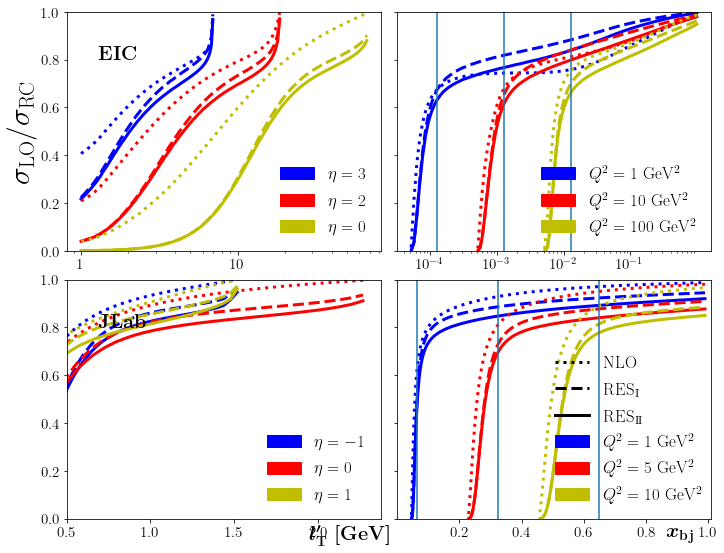

In [160]:






##################################33

ax4.set_xticks([0.2,0.4,0.6,0.8,1.0])
#x4.set_xticklabels([r'$0.2$',r'$0.4$',r'$0.6$',''])

#ax1.set_xticklabels([r'$1$',r'$10$'])
#ax.semilogx()

ax1.set_xscale('log')
ax1.set_xticks([1, 10])
ax1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

ax2.set_xscale('log')
ax2.set_xticks([1e-4,1e-3,1e-2,1e-1])
#ax2.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

#ax3.set_xscale('log')
#ax3.set_xticks([0.1, 0.8])
#ax3.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

#ax3.text(0.1,0.1,r'$\eta=0.1$',transform=ax3.transAxes,size=20,color='y')


H = [ Patch(facecolor='b', edgecolor='b')
     ,Patch(facecolor='r', edgecolor='r')
     ,Patch(facecolor='y', edgecolor='y')]
L =[r'$\eta=3$',r'$\eta=2$',r'$\eta=0$']
ax1.legend(H,L,loc=4,frameon=0,fontsize=17)

H = [ Patch(facecolor='b', edgecolor='b')
     ,Patch(facecolor='r', edgecolor='r')
     ,Patch(facecolor='y', edgecolor='y')]
L =[r'$\eta=-1$',r'$\eta=0$',r'$\eta=1$']
ax3.legend(H,L,loc=4,frameon=0,fontsize=17)

H = [ Patch(facecolor='b', edgecolor='b')
     ,Patch(facecolor='r', edgecolor='r')
     ,Patch(facecolor='y', edgecolor='y')]
L =[r'$Q^2=1~{\rm GeV^2}$',r'$Q^2=10~{\rm GeV^2}$',r'$Q^2=100~{\rm GeV^2}$']
ax2.legend(H,L,loc=4,frameon=0,fontsize=17)

H = [Line2D([0], [0], color='k', linewidth=3, linestyle=':')
    ,Line2D([0], [0], color='k', linewidth=3, linestyle='--')          
    ,Line2D([0], [0], color='k', linewidth=3, linestyle='-')
    ,Patch(facecolor='b', edgecolor='b')
    ,Patch(facecolor='r', edgecolor='r')
    ,Patch(facecolor='y', edgecolor='y')]
L =[ r'$\rm NLO$'
    ,r'$\rm RES_{I}$'
    ,r'$\rm RES_{II}$'
    ,r'$Q^2=1~{\rm GeV^2}$'
    ,r'$Q^2=5~{\rm GeV^2}$'
    ,r'$Q^2=10~{\rm GeV^2}$']
ax4.set_xlim(None,1.01)
leg1=ax4.legend(H,L,loc=4,frameon=0,fontsize=17,bbox_to_anchor=(1.02, 0))


# lines = [ Line2D([0], [0], color='k', linewidth=3, linestyle=':')
#          ,Line2D([0], [0], color='k', linewidth=3, linestyle='--')          
#          ,Line2D([0], [0], color='k', linewidth=3, linestyle='-') ]
# labels = [r'$\rm NLO$'
#           ,r'$\rm RES_{I}$'
#           ,r'$\rm RES_{II}$']
# ax4.legend(lines, labels,fontsize=12,loc=4,frameon=False
#           ,bbox_to_anchor=(1.05, 0.5))
# ax4.add_artist(leg1)
ax4.axvline(5/0.7/(2*11))
ax4.axvline(1/0.7/(2*11))
ax4.axvline(10/0.7/(2*11))

ax2.axvline(1/0.4/(140**2))
ax2.axvline(10/0.4/(140**2))
ax2.axvline(100/0.4/(140**2))
##################################33
#py.tight_layout();
py.savefig('pheno.pdf')


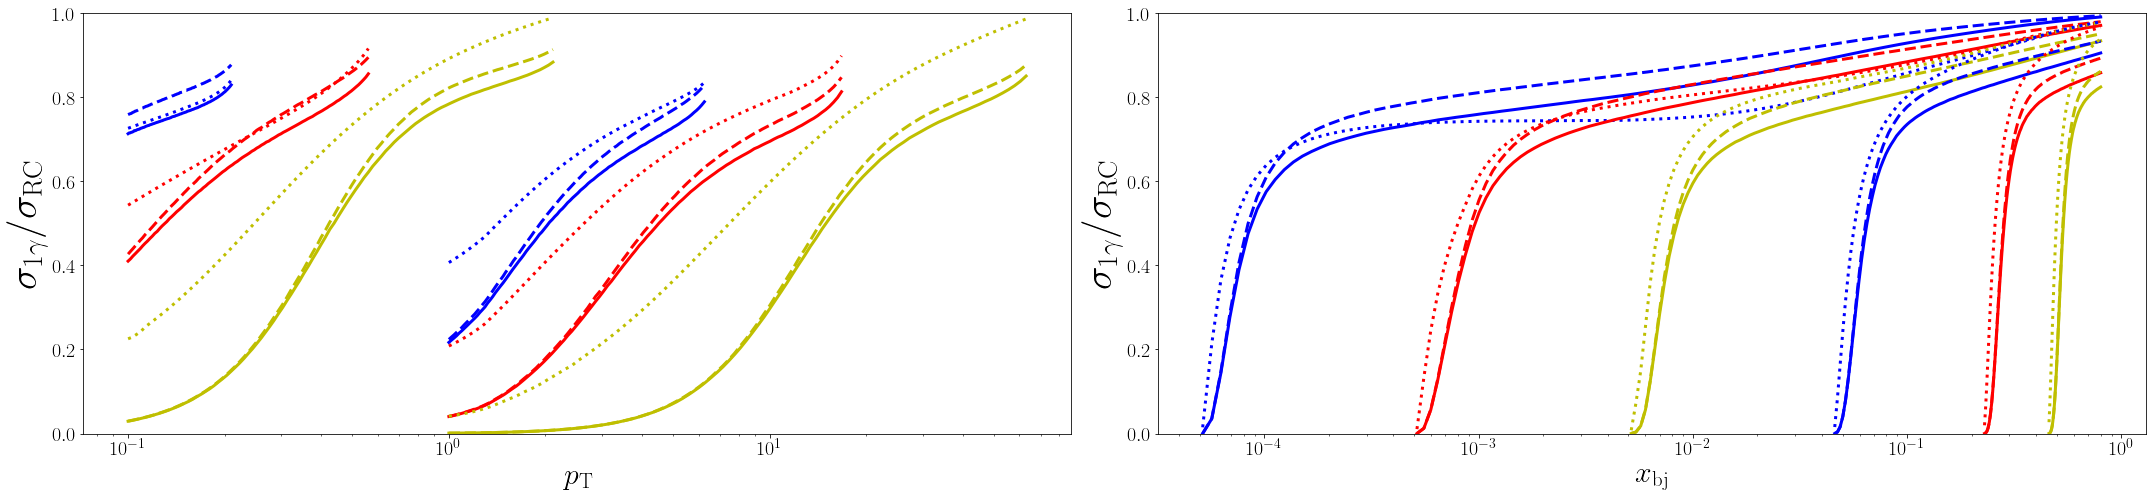

In [29]:
nrows,ncols=1,2
fig = py.figure(figsize=(ncols*15,nrows*7))

ax=py.subplot(nrows,ncols,1)

rs=140
plot_main00(ax,rs,3,'b')
plot_main00(ax,rs,2,'r')
plot_main00(ax,rs,0,'y')
ax.set_ylabel(r"$\sigma_{1\gamma}/\sigma_{\rm RC}$",size=40)
ax.set_xlabel(r'$p_{\rm T}$',size=30)
ax.set_ylim(0,1)
#ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=20)
ax.semilogx()
ax.tick_params(axis='both', which='major', labelsize=20)

rs=np.sqrt(2*11)
plot_main00(ax,rs,3,'b')
plot_main00(ax,rs,2,'r')
plot_main00(ax,rs,0,'y')
ax.set_ylabel(r"$\sigma_{1\gamma}/\sigma_{\rm RC}$",size=40)
ax.set_xlabel(r'$p_{\rm T}$',size=30)
ax.set_ylim(0,1)
#ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=20)
ax.semilogx()
ax.tick_params(axis='both', which='major', labelsize=20)

ax=py.subplot(nrows,ncols,2)
rs=140
plot_main01(ax,rs,1,'b')
plot_main01(ax,rs,10,'r')
plot_main01(ax,rs,100,'y')
ax.set_ylabel(r"$\sigma_{1\gamma}/\sigma_{\rm RC}$",size=40)
ax.set_xlabel(r'$x_{\rm bj}$',size=30)
ax.set_ylim(0,1)
#ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=20)
ax.semilogx()
ax.tick_params(axis='both', which='major', labelsize=20)

rs=np.sqrt(2*11)
plot_main01(ax,rs,1,'b')
plot_main01(ax,rs,5,'r')
plot_main01(ax,rs,10,'y')

ax.set_ylabel(r"$\sigma_{1\gamma}/\sigma_{\rm RC}$",size=40)
ax.set_xlabel(r'$x_{\rm bj}$',size=30)
ax.set_ylim(0,1)
#ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=20)
ax.semilogx()
ax.tick_params(axis='both', which='major', labelsize=20)
py.tight_layout();



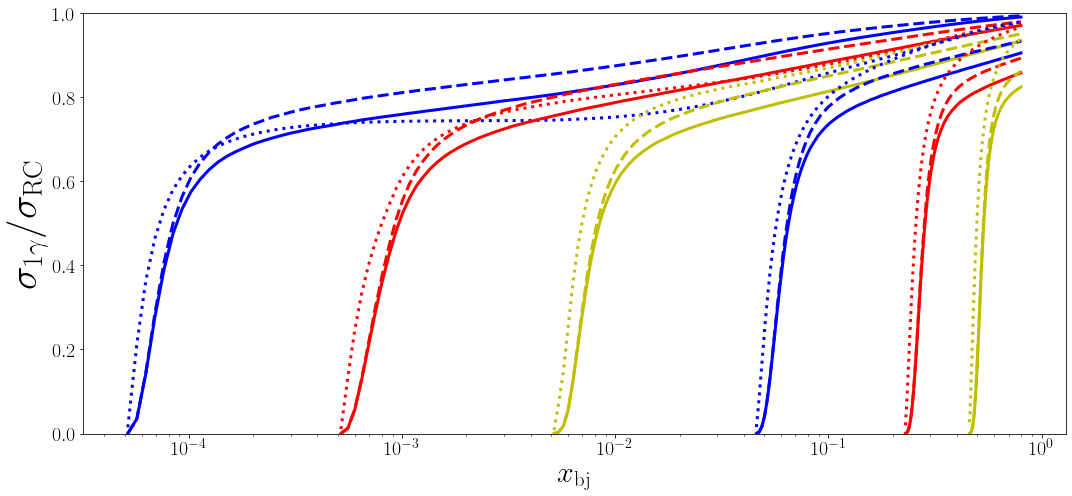

In [26]:
nrows,ncols=1,1
fig = py.figure(figsize=(ncols*15,nrows*7))
ax=py.subplot(nrows,ncols,1)

rs=140
plot_main01(ax,rs,1,'b')
plot_main01(ax,rs,10,'r')
plot_main01(ax,rs,100,'y')

rs=np.sqrt(2*11)
plot_main01(ax,rs,1,'b')
plot_main01(ax,rs,5,'r')
plot_main01(ax,rs,10,'y')

ax.set_ylabel(r"$\sigma_{1\gamma}/\sigma_{\rm RC}$",size=40)
ax.set_xlabel(r'$x_{\rm bj}$',size=30)
ax.set_ylim(0,1)
#ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=20)
ax.semilogx()
ax.tick_params(axis='both', which='major', labelsize=20)
py.tight_layout();

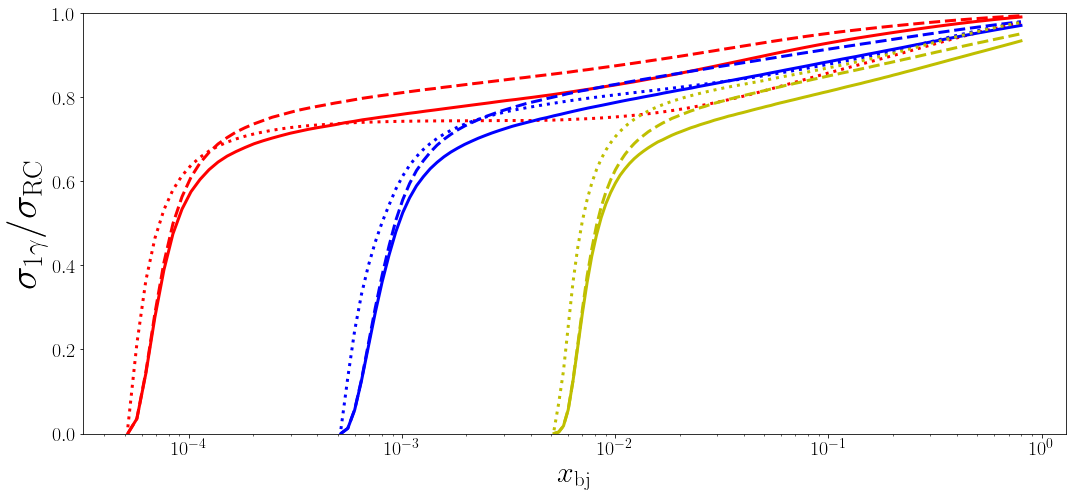

In [143]:
nrows,ncols=1,1
fig = py.figure(figsize=(ncols*15,nrows*7))
ax=py.subplot(nrows,ncols,1)

data=load('data/main01-rs=140.000000-Q2=1.000000.po')
data=pd.DataFrame(data).sort_values(by=['pT'])
T=convert(data)
x=T['x']
T0=T['xsec00']
#ax.plot(pT,T['xsec00'],'r-',lw=3,label=r'$\rm LO$')
ax.plot(x,T0/(T['xsec00']+T['xsec01A']+T['xsec10']),'r:',lw=3,label=r'$\rm LO$')
ax.plot(x,T0/(T['xsec00']+T['xsec_res0']),'r--',lw=3,label=r'$\rm LO$')
ax.plot(x,T0/(T['xsec00']+T['xsec_res1']),'r-',lw=3,label=r'$\rm LO$')


data=load('data/main01-rs=140.000000-Q2=10.000000.po')
data=pd.DataFrame(data).sort_values(by=['pT'])
T=convert(data)
x=T['x']
T0=T['xsec00']
#ax.plot(pT,T['xsec00'],'r-',lw=3,label=r'$\rm LO$')
ax.plot(x,T0/(T['xsec00']+T['xsec01A']+T['xsec10']),'b:',lw=3,label=r'$\rm LO$')
ax.plot(x,T0/(T['xsec00']+T['xsec_res0']),'b--',lw=3,label=r'$\rm LO$')
ax.plot(x,T0/(T['xsec00']+T['xsec_res1']),'b-',lw=3,label=r'$\rm LO$')
ax.semilogx()


data=load('data/main01-rs=140.000000-Q2=100.000000.po')
data=pd.DataFrame(data).sort_values(by=['pT'])
T=convert(data)
x=T['x']
T0=T['xsec00']
#ax.plot(pT,T['xsec00'],'r-',lw=3,label=r'$\rm LO$')
ax.plot(x,T0/(T['xsec00']+T['xsec01A']+T['xsec10']),'y:',lw=3,label=r'$\rm LO$')
ax.plot(x,T0/(T['xsec00']+T['xsec_res0']),'y--',lw=3,label=r'$\rm LO$')
ax.plot(x,T0/(T['xsec00']+T['xsec_res1']),'y-',lw=3,label=r'$\rm LO$')
ax.semilogx()

#ax.legend()
#ax.text(0.1,0.1,r'$\eta=%0.0f$'%eta,transform=ax.transAxes,size=20)
ax.set_ylabel(r"$\sigma_{1\gamma}/\sigma_{\rm RC}$",size=40)
ax.set_xlabel(r'$x_{\rm bj}$',size=30)
ax.set_ylim(0,1)
#ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=20)
ax.semilogx()
ax.tick_params(axis='both', which='major', labelsize=20)
py.tight_layout();

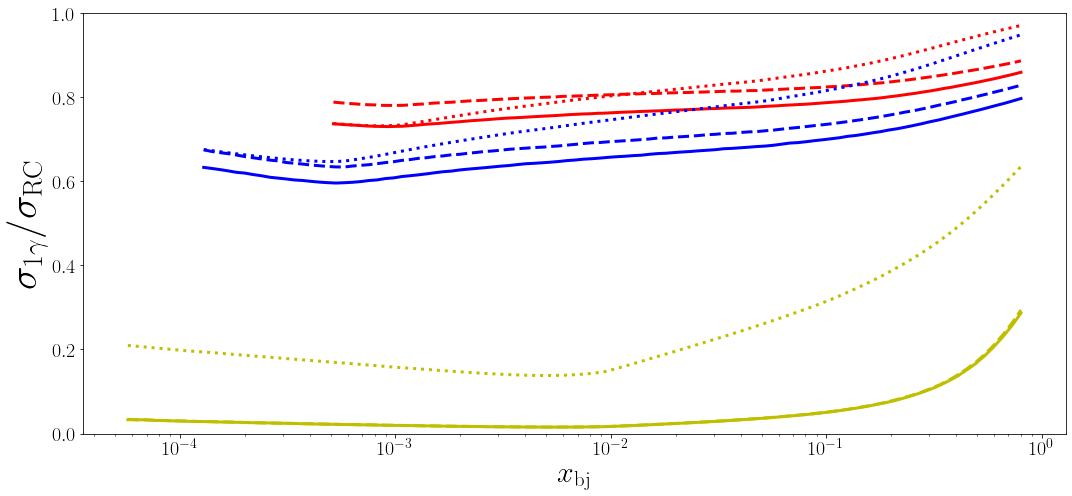

In [172]:
nrows,ncols=1,1
fig = py.figure(figsize=(ncols*15,nrows*7))
ax=py.subplot(nrows,ncols,1)

data=load('data/main02-rs=140.000000-y=0.100000.po')
data=pd.DataFrame(data).sort_values(by=['pT'])
T=convert(data)
x=T['x']
T0=T['xsec00']
#ax.plot(pT,T['xsec00'],'r-',lw=3,label=r'$\rm LO$')
ax.plot(x,T0/(T['xsec00']+T['xsec01A']+T['xsec10']),'r:',lw=3,label=r'$\rm LO$')
ax.plot(x,T0/(T['xsec00']+T['xsec_res0']),'r--',lw=3,label=r'$\rm LO$')
ax.plot(x,T0/(T['xsec00']+T['xsec_res1']),'r-',lw=3,label=r'$\rm LO$')


data=load('data/main02-rs=140.000000-y=0.400000.po')
data=pd.DataFrame(data).sort_values(by=['pT'])
T=convert(data)
x=T['x']
T0=T['xsec00']
#ax.plot(pT,T['xsec00'],'r-',lw=3,label=r'$\rm LO$')
ax.plot(x,T0/(T['xsec00']+T['xsec01A']+T['xsec10']),'b:',lw=3,label=r'$\rm LO$')
ax.plot(x,T0/(T['xsec00']+T['xsec_res0']),'b--',lw=3,label=r'$\rm LO$')
ax.plot(x,T0/(T['xsec00']+T['xsec_res1']),'b-',lw=3,label=r'$\rm LO$')
ax.semilogx()

data=load('data/main02-rs=140.000000-y=0.900000.po')
data=pd.DataFrame(data).sort_values(by=['pT'])
T=convert(data)
x=T['x']
T0=T['xsec00']
#ax.plot(pT,T['xsec00'],'r-',lw=3,label=r'$\rm LO$')
ax.plot(x,T0/(T['xsec00']+T['xsec01A']+T['xsec10']),'y:',lw=3,label=r'$\rm LO$')
ax.plot(x,T0/(T['xsec00']+T['xsec_res0']),'y--',lw=3,label=r'$\rm LO$')
ax.plot(x,T0/(T['xsec00']+T['xsec_res1']),'y-',lw=3,label=r'$\rm LO$')
ax.semilogx()

#ax.legend()
#ax.text(0.1,0.1,r'$\eta=%0.0f$'%eta,transform=ax.transAxes,size=20)
ax.set_ylabel(r"$\sigma_{1\gamma}/\sigma_{\rm RC}$",size=40)
ax.set_xlabel(r'$x_{\rm bj}$',size=30)
ax.set_ylim(0,1)
#ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=20)
ax.semilogx()
ax.tick_params(axis='both', which='major', labelsize=20)
py.tight_layout();

## JLab

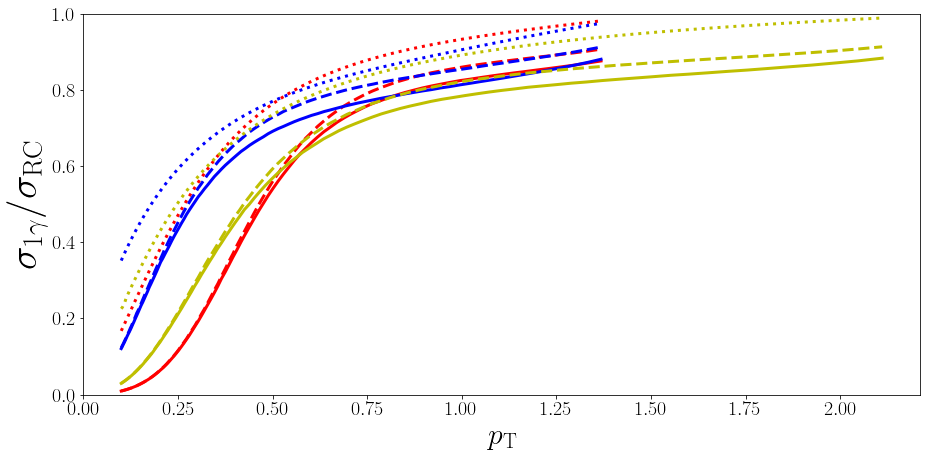

In [222]:
nrows,ncols=1,1
fig = py.figure(figsize=(ncols*15,nrows*7))
ax=py.subplot(nrows,ncols,1)

data=load('data/main00-rs=4.690416-eta=-1.000000.po')
data=pd.DataFrame(data).sort_values(by=['pT'])
T=convert(data)
pT=T['pT']
T0=T['xsec00']
#ax.plot(pT,T['xsec00'],'r-',lw=3,label=r'$\rm LO$')
ax.plot(pT,T0/(T['xsec00']+T['xsec01A']+T['xsec10']),'r:',lw=3,label=r'$\rm LO$')
ax.plot(pT,T0/(T['xsec00']+T['xsec_res0']),'r--',lw=3,label=r'$\rm LO$')
ax.plot(pT,T0/(T['xsec00']+T['xsec_res1']),'r-',lw=3,label=r'$\rm LO$')

data=load('data/main00-rs=4.690416-eta=1.000000.po')
data=pd.DataFrame(data).sort_values(by=['pT'])
T=convert(data)
pT=T['pT']
T0=T['xsec00']
#ax.plot(pT,T['xsec00'],'r-',lw=3,label=r'$\rm LO$')
ax.plot(pT,T0/(T['xsec00']+T['xsec01A']+T['xsec10']),'b:',lw=3,label=r'$\rm LO$')
ax.plot(pT,T0/(T['xsec00']+T['xsec_res0']),'b--',lw=3,label=r'$\rm LO$')
ax.plot(pT,T0/(T['xsec00']+T['xsec_res1']),'b-',lw=3,label=r'$\rm LO$')

data=load('data/main00-rs=4.690416-eta=0.000000.po')
data=pd.DataFrame(data).sort_values(by=['pT'])
T=convert(data)
pT=T['pT']
T0=T['xsec00']
#ax.plot(pT,T['xsec00'],'r-',lw=3,label=r'$\rm LO$')
ax.plot(pT,T0/(T['xsec00']+T['xsec01A']+T['xsec10']),'y:',lw=3,label=r'$\rm LO$')
ax.plot(pT,T0/(T['xsec00']+T['xsec_res0']),'y--',lw=3,label=r'$\rm LO$')
ax.plot(pT,T0/(T['xsec00']+T['xsec_res1']),'y-',lw=3,label=r'$\rm LO$')

#ax.legend()
#ax.text(0.1,0.1,r'$\eta=%0.0f$'%eta,transform=ax.transAxes,size=20)
ax.set_ylabel(r"$\sigma_{1\gamma}/\sigma_{\rm RC}$",size=40)
ax.set_xlabel(r'$p_{\rm T}$',size=30)
ax.set_ylim(0,1)
#ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=20)
#ax.semilogx()
ax.tick_params(axis='both', which='major', labelsize=20)





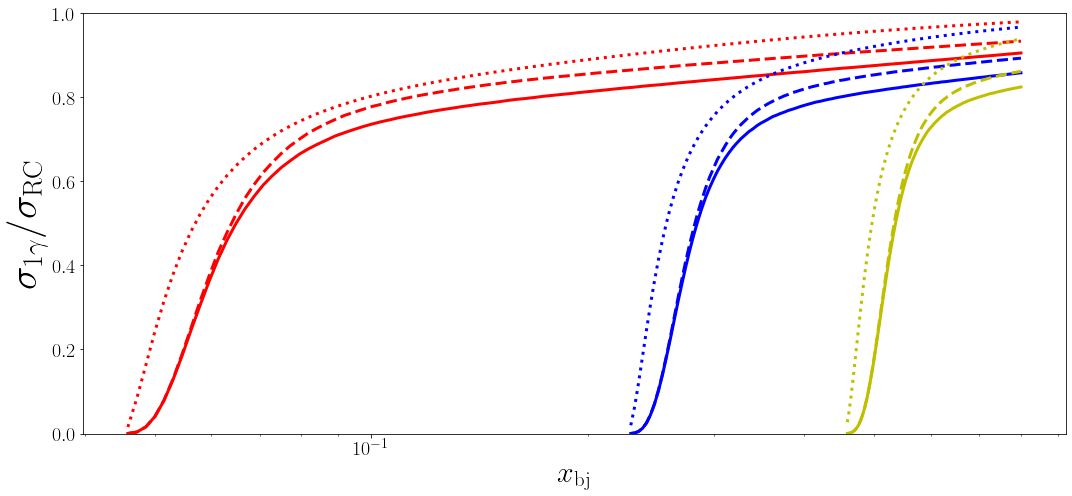

In [221]:
nrows,ncols=1,1
fig = py.figure(figsize=(ncols*15,nrows*7))
ax=py.subplot(nrows,ncols,1)

data=load('data/main01-rs=4.690416-Q2=1.000000.po')
data=pd.DataFrame(data).sort_values(by=['pT'])
T=convert(data)
x=T['x']
T0=T['xsec00']
#ax.plot(pT,T['xsec00'],'r-',lw=3,label=r'$\rm LO$')
ax.plot(x,T0/(T['xsec00']+T['xsec01A']+T['xsec10']),'r:',lw=3,label=r'$\rm LO$')
ax.plot(x,T0/(T['xsec00']+T['xsec_res0']),'r--',lw=3,label=r'$\rm LO$')
ax.plot(x,T0/(T['xsec00']+T['xsec_res1']),'r-',lw=3,label=r'$\rm LO$')


data=load('data/main01-rs=4.690416-Q2=5.000000.po')
data=pd.DataFrame(data).sort_values(by=['pT'])
T=convert(data)
x=T['x']
T0=T['xsec00']
#ax.plot(pT,T['xsec00'],'r-',lw=3,label=r'$\rm LO$')
ax.plot(x,T0/(T['xsec00']+T['xsec01A']+T['xsec10']),'b:',lw=3,label=r'$\rm LO$')
ax.plot(x,T0/(T['xsec00']+T['xsec_res0']),'b--',lw=3,label=r'$\rm LO$')
ax.plot(x,T0/(T['xsec00']+T['xsec_res1']),'b-',lw=3,label=r'$\rm LO$')
ax.semilogx()


data=load('data/main01-rs=4.690416-Q2=10.000000.po')
data=pd.DataFrame(data).sort_values(by=['pT'])
T=convert(data)
x=T['x']
T0=T['xsec00']
#ax.plot(pT,T['xsec00'],'r-',lw=3,label=r'$\rm LO$')
ax.plot(x,T0/(T['xsec00']+T['xsec01A']+T['xsec10']),'y:',lw=3,label=r'$\rm LO$')
ax.plot(x,T0/(T['xsec00']+T['xsec_res0']),'y--',lw=3,label=r'$\rm LO$')
ax.plot(x,T0/(T['xsec00']+T['xsec_res1']),'y-',lw=3,label=r'$\rm LO$')
#ax.semilogx()

#ax.legend()
#ax.text(0.1,0.1,r'$\eta=%0.0f$'%eta,transform=ax.transAxes,size=20)
ax.set_ylabel(r"$\sigma_{1\gamma}/\sigma_{\rm RC}$",size=40)
ax.set_xlabel(r'$x_{\rm bj}$',size=30)
ax.set_ylim(0,1)
#ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=20)
#ax.semilogx()
ax.tick_params(axis='both', which='major', labelsize=20)
py.tight_layout();

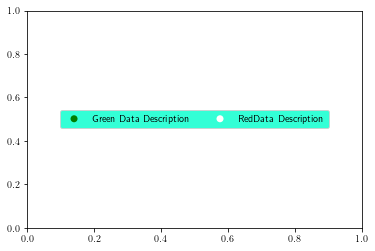

In [209]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
from matplotlib.legend_handler import HandlerPatch
colors = ["g", "w"]
texts = ["Green Data Description", "RedData Description"]
class HandlerEllipse(HandlerPatch):
    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height, fontsize, trans):
        center = 0.5 * width - 0.5 * xdescent, 0.5 * height - 0.5 * ydescent
        p = mpatches.Ellipse(xy=center, width=height + xdescent,
                             height=height + ydescent)
        self.update_prop(p, orig_handle, legend)
        p.set_transform(trans)
        return [p]


c = [ mpatches.Circle((0.5, 0.5), radius = 0.25, facecolor=colors[i], edgecolor="none" ) for i in range(len(texts))]
plt.legend(c,texts,bbox_to_anchor=(0.5, 0.5), loc='center', ncol=2, handler_map={mpatches.Circle: HandlerEllipse()}).get_frame().set_facecolor('#00FFCC')
plt.show()


In [ ]:
colors = ['black', 'red', 'green']
lines = [ (Line2D([0], [0,1], color=c, linewidth=3, linestyle='--')
        ,Line2D([0], [0,1], color=c, linewidth=3, linestyle=':')
          ) 
           for c in colors]
labels = ['black data', 'red data', 'green data']
ax.legend(lines, labels,fontsize=20)


# import matplotlib.patches as mpatches


# class AnyObject(object):
#     pass


# class AnyObjectHandler(object):
#     def legend_artist(self, legend, orig_handle, fontsize, handlebox):
#         x0, y0 = handlebox.xdescent, handlebox.ydescent
#         width, height = handlebox.width, handlebox.height
#         #patch = mpatches.Rectangle([x0, y0], width, height, facecolor='red',
#         #                           edgecolor='black', hatch='xx', lw=3,
#         #                           transform=handlebox.get_transform())
#         #handlebox.add_artist(patch)
        
#         patch1=Line2D([0,30], [0,0], color='m', linewidth=3, linestyle='--')
#         patch2=Line2D([0,30], [1,1], color='m', linewidth=3, linestyle='--')

        
#         handlebox.add_artist(patch)
 
#         return patch


# ax.legend([AnyObject()], ['My first handler'],
#            handler_map={AnyObject: AnyObjectHandler()},fontsize=20)
# py.tight_layout();

In [ ]:
colors = ['black', 'red', 'green']
lines = [ (Line2D([0], [0,1], color=c, linewidth=3, linestyle='--')
        ,Line2D([0], [0,1], color=c, linewidth=3, linestyle=':')
          ) 
           for c in colors]
labels = ['black data', 'red data', 'green data']
ax.legend(lines, labels,fontsize=20)


import matplotlib.patches as mpatches


class AnyObject(object):
    pass


class AnyObjectHandler(object):
    def legend_artist(self, legend, orig_handle, fontsize, handlebox):
        x0, y0 = handlebox.xdescent, handlebox.ydescent
        width, height = handlebox.width, handlebox.height
        #patch = mpatches.Rectangle([x0, y0], width, height, facecolor='red',
        #                           edgecolor='black', hatch='xx', lw=3,
        #                           transform=handlebox.get_transform())
        #handlebox.add_artist(patch)
        
        #patch1=Line2D([0,30], [0,0], color='m', linewidth=3, linestyle='--')
        patch=Line2D([0,30], [10,10], color='m', linewidth=3, linestyle='--')
        
        handlebox.add_artist(patch)
 
        return patch


ax.legend([AnyObject()], ['My first handler'],
           handler_map={AnyObject: AnyObjectHandler()},fontsize=20)
py.tight_layout();

# from matplotlib.legend_handler import HandlerLine2D, HandlerTuple,HandlerStem

# #p1, = ax.plot([1, 2.5, 3], 'r-d')
# #p2, = ax.plot([3, 2, 1], 'k-o')

# l = ax.legend([(p1, p2,p3)], 
#               ['Two keys'], 
#               #numpoints=2,
#              #handler_map={"stem": HandlerStem(marker_pad=1.3, 
#                                                #numpoints=None, bottom=None, yoffsets=10)}

#               #handler_map={tuple: HandlerTuple(ndivide=4)}
#               fontsize=40
#              )